

> Este código implementa un agente de Q-Learning que aprende a navegar un entorno llamado "FrozenLake", donde el objetivo es llegar a una meta en un lago congelado evitando caer en agujeros. El agente mejora su estrategia a través de la experiencia, tomando decisiones basadas en una tabla Q que se actualiza con cada acción realizada. El proceso involucra explorar diferentes acciones al principio, y luego ir afinando la estrategia para maximizar las recompensas. Al final, se grafican los resultados del aprendizaje, mostrando cómo mejoró el agente en términos de recompensas obtenidas y pasos necesarios para alcanzar la meta.



/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


¡Entrenamiento completado!


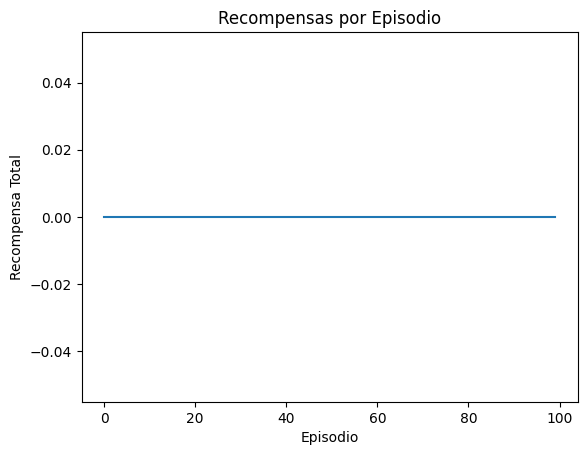

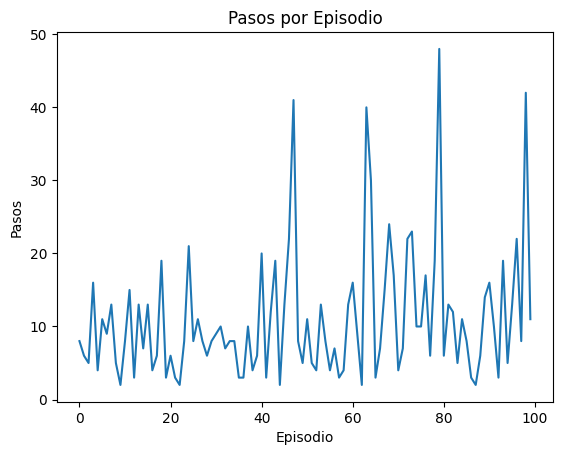

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


In [ ]:


import numpy as np
import gym
import random
import matplotlib.pyplot as plt

# Crear el entorno
env = gym.make('FrozenLake-v1', is_slippery=False)

# Parámetros de Q-Learning
alpha = 0.8  # Tasa de aprendizaje
gamma = 0.95  # Factor de descuento
epsilon_inicial = 1.0  # Tasa de exploración inicial
epsilon_final = 0.01  # Tasa de exploración final
epsilon_decaimiento = 0.995  # Factor de decaimiento de epsilon

# Inicializar la Q-Table
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Listas para almacenar recompensas y pasos por episodio
recompensas_episodios = []
pasos_episodios = []

# Función para elegir una acción basada en la política epsilon-greedy
def elegir_accion(estado, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Explorar
    else:
        return np.argmax(q_table[estado])  # Explotar

# Entrenamiento del agente
num_episodios = 100
pasos_por_episodio = 10
epsilon = epsilon_inicial
for episodio in range(num_episodios):
    estado = env.reset()
    recompensa_total = 0
    pasos = 0
    done = False

    while not done:
        accion = elegir_accion(estado, epsilon)
        nuevo_estado, recompensa, done, _ = env.step(accion)

        # Actualizar la Q-Table
        q_table[estado, accion] = q_table[estado, accion] + alpha * (recompensa + gamma * np.max(q_table[nuevo_estado]) - q_table[estado, accion])

        estado = nuevo_estado
        recompensa_total += recompensa
        pasos += 1

    recompensas_episodios.append(recompensa_total)
    pasos_episodios.append(pasos)

    # Decaer epsilon
    epsilon = max(epsilon_final, epsilon * epsilon_decaimiento)

print("¡Entrenamiento completado!")

# Graficar las recompensas y pasos por episodio
plt.plot(recompensas_episodios)
plt.xlabel('Episodio')
plt.ylabel('Recompensa Total')
plt.title('Recompensas por Episodio')
plt.show()

plt.plot(pasos_episodios)
plt.xlabel('Episodio')
plt.ylabel('Pasos')
plt.title('Pasos por Episodio')
plt.show()

# Probar el agente entrenado (opcional)
estado = env.reset()
env.render()
done = False

while not done:
    accion = np.argmax(q_table[estado])
    nuevo_estado, recompensa, done, _ = env.step(accion)
    env.render()
    estado = nuevo_estado
